# ME 581 Final Exam Solution (Python 3)
Yi Yang &copy; (yang1087@purdue.edu). All rights reserved.

## Problem 1
A given geothermal heat pump uses the heat naturally stored in the ground to heat cold water pumped through underground pipes during the winter (see Figure 1.1).

The time-dependent temperature distribution $T(y,\;t)$ of the water pumped through a single pipe (see Figure 1.2) satisfies the equation
$$\frac{\partial T}{\partial t} + \nu\frac{\partial T}{\partial y} = \frac{4h}{\rho c_p d}(T_g - T)$$
where $\nu = 1$ m/s is the velocity of the water pumped through the pipe, $h = 990$ $W/(m^2\cdot ^{o}C)$ is the heat transfer coefficient, $\rho = 1000$ $kg/m^3$ is the density of the water, $c_p = 4180$ $J/(kg\cdot ^{o}C)$ is the heat capacity of the water, and $d = 70$ mm is the diameter of the pipe.
![Figure1](final1.png)
Consider a single vertical pipe in this system. The initial temperature distribution of the water along the pipe is taken as identical to the temperature profile of the ground,

$$T(y,0) = T_g = (3 + 10e^{-\frac{1}{2y}})\; ^{o}C$$

where $y$ is in meters. As the heat pump is turned on and the water begins to flow, the temperature of the water flowing into the intake is constant at $T(0,t) = 3\;^{o}C$.

Apply an explicit first-order finite difference method with a spatial discretization of $\Delta y = 0.05\;m$ and a temporal discretization of $\Delta t = 0.005\;s$ to approximate the temperature $T(y,t)$ of the water in the pipe for the first $10$ seconds of operation. Graph the temperature profile $T(y,t)$ at 1-second intervals from $t = 0$ to $t = 10\;s$.

$\textbf{Solution:}$ Apply Newton forward difference to the equation, we have
    $$\frac{T_{i}^{k+1} - T_{i}^{k}}{\Delta t} + \nu\frac{T_{i}^{k} - T_{i-1}^{k}}{\Delta y} = \frac{4h}{\rho c_pd}(T_g - T_{i}^k)$$
    $$T_g = 3 + 10e^{-\frac{1}{2y_i}},\quad y_i = i\cdot\Delta y,\; i = 0,1,\cdots, \frac{L}{\Delta y}$$
The code used to solve this difference equation is given, the graph is plotted below,

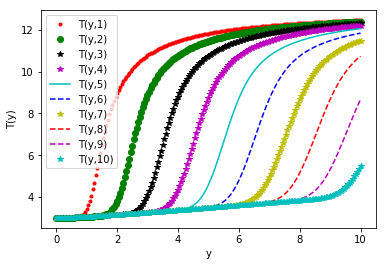

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve

h1 = 990.
nu = 1.
rho = 1000.
cp = 4180.
d = 0.07
L1 = 10.
dy1 = 0.05
T1 = 10.
dt1 = 0.005
y1 = np.linspace(0., L1, int(L1/dy1+1))    # mesh points in space
t1 = np.linspace(0, T1, int(T1/dt1 + 1))    # mesh points in time
F1 = -nu*dt1/dy1
G1 = 4.*h1*dt1/(rho*cp*d)
u1 = np.zeros(int(L1/dy1+1))           # unknown u at new time level
u_1 = np.zeros(int(L1/dy1+1))           # u at the previous time level

# Set initial condition u(x,0) = I(x)
u_1[0] = 3.
u_1[1:] = 3. + 10.*np.exp(-1./(2*y1[1:]))
Tg1 = np.copy(u_1)

for n in range(0, int(T1/dt1)):
    # Compute u at inner mesh points
    for i in range(1, int(L1/dy1)+1):
        u1[i] = u_1[i] + F1*(u_1[i] - u_1[i-1]) + G1*(Tg1[i] - u_1[i])

    # Insert boundary conditions
    u1[0] = 3.

    # Update u_1 before next step
    u_1[:]= u1
    if n == 199:
        u11 = np.copy(u1)
    if n == 399:
        u12 = np.copy(u1)
    if n == 599:
        u13 = np.copy(u1)
    if n == 799:
        u14 = np.copy(u1)
    if n == 999:
        u15 = np.copy(u1)
    if n == 1199:
        u16 = np.copy(u1)
    if n == 1399:
        u17 = np.copy(u1)
    if n == 1599:
        u18 = np.copy(u1)
    if n == 1799:
        u19 = np.copy(u1)
    if n == 1999:
        u110 = np.copy(u1)
plt.figure(1)
plt.plot(y1,u11,'r.',label='T(y,1)')
plt.plot(y1,u12,'go',label='T(y,2)')
plt.plot(y1,u13,'k*',label='T(y,3)')
plt.plot(y1,u14,'m*',label='T(y,4)')
plt.plot(y1,u15,'c-',label='T(y,5)')
plt.plot(y1,u16,'b--',label='T(y,6)')
plt.plot(y1,u17,'y*',label='T(y,7)')
plt.plot(y1,u18,'r--',label='T(y,8)')
plt.plot(y1,u19,'m--',label='T(y,9)')
plt.plot(y1,u110,'c*',label='T(y,10)')
plt.xlabel('y')
plt.ylabel('T(y)')
plt.legend()
plt.show()

## Problem 2
Solve the given convection-diffusion equation using finite differencing methods over the domain $0 \leq x \leq 1$ and $0 \leq y \leq 1$ as shown in Figure 1.
![Figure2](final2.png)

$$C\frac{\partial u}{\partial x} = D\frac{\partial^2 u}{\partial y^2},\;\text{where }C = 1\;m/s \text{ and }D = 0.05\;m^2/s\;(2.1)$$

subject to the boundary conditions,

Inflow boundary condition: $u(x = 0,y) = 1 \text{ m/s}$

No slip boundary condition at the wall: $u(x,y = 0) = 0$

Far away from the plate wall: $u(x,y = 1) = 1 \text{ m/s}$

(a) (40 points) Solve using finite difference with $\Delta X = \Delta Y = 0.01$. Show the approximate solution in a contour plot of $u(x,y)$.

(b) (10 points) Find the exact solution to the above equation using separation of variables method. Compare (plot) the approximate solution and the exact solution $u(x,y)$ at $x = 0.1\text{ m, }0.5\text{ m and }0.8\text{ m}$ as a function of $y$.

$\textbf{Solution:}$ 

(a) Since the the given analogous time step and space step are both stringent, explicit difference method can hardly be applied to this equation. Crank-Nicolson method then is applied to this analogous heat equation to get the stable numerical solution.

$$u_i^{k+1} - u_i^k = \frac{D\Delta X}{2C}(\frac{u_{i+1}^{k+1} - 2u_i^{k+1} + u_{i-1}^{k+1}}{\Delta Y^2} + \frac{u_{i+1}^{k} - 2u_i^{k} + u_{i-1}^{k}}{\Delta Y^2})$$

Define $\beta = \sigma = \frac{D\Delta X}{C\Delta Y^2}$, then we have

$$-\beta u_{i+1}^{k+1} + (1 + 2\beta)u_i^{k+1} - \beta u_{i-1}^{k+1} = \beta u_{i+1}^k + (1 - 2\beta)u_i^k + \beta u_{i-1}^k$$

Then the whole system can be expressed as 

$$Au^{k+1} = Bu^{k} + b,\;\text{ while }k = 0,1,\cdots,n-1$$

$$A = \begin{bmatrix}
2+2\sigma  & -\sigma  & 0 & \cdots & \cdots & \cdots & \cdots & 0 \\
-\sigma  & 2+2\sigma  & -\sigma  & \ddots & && & \vdots \\
0 & -\sigma  & 2+2\sigma & -\sigma  & \ddots & &  & \vdots \\
\vdots & \ddots & \ddots & \ddots & \ddots & \ddots &  & \vdots \\
\vdots & & \ddots & \ddots & \ddots & \ddots & \ddots& \vdots\\
\vdots  & & & \ddots & -\sigma  & 2+2\sigma  &  -\sigma  & 0\\
\vdots  & && & \ddots & -\sigma  & 2+2\sigma  &  -\sigma\\
0 & \cdots &  \cdots & \cdots & \cdots & 0 & 2+2\sigma & -\sigma  \\
\end{bmatrix}\quad B = \begin{bmatrix}
2-2\sigma  & \sigma  & 0 & \cdots & \cdots & \cdots & \cdots & 0 \\
\sigma  & 2-2\sigma  & \sigma  & \ddots & && & \vdots \\
0 & \sigma  & 2-2\sigma & \sigma  & \ddots & &  & \vdots \\
\vdots & \ddots & \ddots & \ddots & \ddots & \ddots &  & \vdots \\
\vdots & & \ddots & \ddots & \ddots & \ddots & \ddots& \vdots\\
\vdots  & & & \ddots & \sigma  & 2-2\sigma  &  \sigma  & 0\\
\vdots  & && & \ddots & \sigma  & 2-2\sigma  &  \sigma\\
0 & \cdots &  \cdots & \cdots & \cdots & 0 & 2-2\sigma & \sigma  \\
\end{bmatrix}\quad b = \begin{bmatrix}
\sigma(u_0^k + u_0^{k+1})\\
0\\
\vdots\\
0\\
\sigma(u_{n+1}^k + u_{n+1}^{k+1})
\end{bmatrix}$$
The code to implement this algorithm is given below

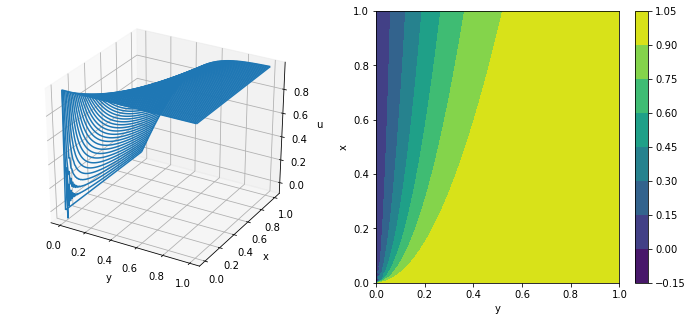

[[ 0.      0.      0.     ...,  0.      0.      0.    ]
 [ 1.     -0.0734  0.3527 ...,  0.0255  0.0254  0.0252]
 [ 1.      0.424   0.3053 ...,  0.0509  0.0507  0.0504]
 ..., 
 [ 1.      1.      1.     ...,  0.9994  0.9993  0.9993]
 [ 1.      1.      1.     ...,  0.9997  0.9997  0.9997]
 [ 1.      1.      1.     ...,  1.      1.      1.    ]]


In [3]:
# Gauss elimination with partial pipvotting function, implemented in ME 581 HW 2 by Yi Yang
def gaussElim(A, b):
    n = len(b)
    for k in range(0,n-1):
        r = abs(A[k:,k]).argmax() + k
        if A[r,k] == 0.0:
            print("The system does not have unique solution.")
            break
        else:
            A[[k,r]] = A[[r,k]]
            b[[k,r]] = b[[r,k]]
        for i in range(k+1,n):
            lam = A[i,k]/A[k,k]
            A[i,k+1:n] = A[i,k+1:n] - lam*A[k,k+1:n]
            b[i] = b[i] - lam*b[k]
    b[n-1] = b[n-1]/A[n-1,n-1]
    for k in range(n-2,-1,-1):
        b[k] = (b[k] - A[k,k+1:n].dot(b[k+1:n]))/A[k,k]
    return b
# Crank-Nicolson method
# with Dirichlet boundary conditions
# Reference to http://ww2.math.buffalo.edu/438/sauer2py/crank.py
# Input: space interval [xl,xr], time interval [yb,yt],
#        number of space steps M, number of time steps N
# Output: solution w
# Example usage: w=crank(0,1,0,1,10,10)

from mpl_toolkits.mplot3d import axes3d, Axes3D

def crank(xl,xr,yb,yt,M,N,f,l,r):
    D = 0.05         # diffusion coefficient, D = D/C
    h = float(xr-xl)/M; k=float(yt-yb)/N; m=M-1; n=N
    sigma = D*k/(h*h)
    a  = np.diag(2+2*sigma*np.ones(m)) + np.diag(-sigma*np.ones(m-1),1) # define tridiagonal matrices a and b
    b  = np.diag(2-2*sigma*np.ones(m)) + np.diag( sigma*np.ones(m-1),1) 
    a += np.diag(-sigma*np.ones(m-1),-1)
    b += np.diag( sigma*np.ones(m-1),-1)
    xvals = np.linspace(xl,xr,M+1)
    yvals = np.linspace(yb,yt,N+1)
    w = np.zeros((N+1,m))   # 1st index is time index
    w[0,:] = f(xvals[1:-1]) # initial conditions
    lvals = l(yvals); rvals = r(yvals) # boundary conditions
    for j in range(n):
        sides = np.hstack((lvals[j]+lvals[j+1],np.zeros(m-2),rvals[j]+rvals[j+1]))
        # note here we can use gauss elimination or use solve function implemented in np.linalg
        #w[j+1,:] = np.linalg.solve( a, np.dot(b,w[j,:]) + sigma*sides )
        w[j+1,:] = gaussElim(np.copy(a), np.copy(np.dot(b,w[j,:]) + sigma*sides))
    w = np.vstack((lvals,w.T,rvals)).T
    [x,y] = np.meshgrid(xvals,yvals) # 3-D plot of solution w
    fig = plt.figure(figsize=(12, 5)) 
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.plot_wireframe(x, y, w, rstride=200 )
    ax1.set_xlabel('y'); ax1.set_ylabel('x'); ax1.set_zlabel('u')
    ax2 = fig.add_subplot(122)
    ax2.set_xlabel('y'); ax2.set_ylabel('x')
    cp2 = ax2.contourf(x,y,w)
    fig.colorbar(cp2)
    #ax.set_zlim(-1,1)   # (Doesn't work)
    plt.show()
    return w
def f(x):
    return np.ones(x.size)
def l(t):
    return np.zeros(t.size)
def r(t):
    return np.ones(t.size)
np.set_printoptions(precision=4,linewidth=220)
w = crank(0,1,0,1,100,100,f,l,r)
print(w.T)

(b) Separation of variables method is applied to find the exact solution to the above equaiton. In order to fully utilize the boundary condition, we define $w(x,y) = u(x,y) - y$, suppose w(x,y) has a solution form as

$$w(x,y) = G(x)F(y)$$

Substitute this form into PDE,

$$\frac{\dot{G}}{c^2G} = \frac{F''}{F},\quad \text{where }c^2 = \frac{D}{C} = 0.05$$

The expression on the left depends only on $x$, while the right-hand side depends only on $y$. We conclude that both side expressions must be equal to a constant $k$. It is easily to verify that if $k\geq 0$, the final solution will be $w(x,y) = 0$, that is $u(x,y) = w(x,y) + y$. Hence, we will suppose $k = -p^2$ and we can transform the PDE into two equivalent ODEs, that is

$$\dot{G} + c^2p^2G = 0$$

$$F'' + p^2F = 0$$

Impose the boundary conditions: $w(x,0) = 0$ and $w(x,1) = 1 - 1 = 0$, and initial condition $w(0,y) = 1 - y$ to this two ODEs respectively, we can get the analytical solution to the original PDE, that is

$$u(x,y) = y + w(x,y) = y + \sum_{n=1}^\infty B_n\sin \frac{n\pi y}{L}e^{-(\frac{cn\pi}{L})^2x},\quad \text{where }L = 1, c^2 = 0.05$$

$$B_n = \frac{2}{L}\int_0^Lw(0,y)\sin \frac{n\pi y}{L}dy = -2\frac{\sin n\pi - n\pi}{n^2\pi^2}$$

Hence, the final result is 

$$u(x,y) = y + \sum_{n=1}^\infty (-2\frac{\sin n\pi - n\pi}{n^2\pi^2})\sin(n\pi y)e^{-0.05n^2\pi^2x}$$

The code given below is used to compare the approximate solution and the exact solution at $x = 0.1$ m, $0.5$ m and $0.8$ m as a function of y.

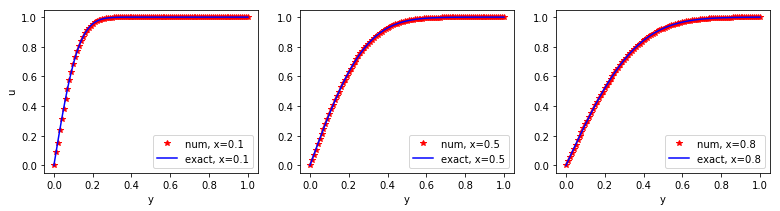

In [5]:
# Define exact solution, approximate by maintaining the first 20 terms
def u_exact(x,y):
    uu = np.copy(y)
    for nn in range(1,21):
        uu += (-2.*(np.sin(nn*np.pi) - nn*np.pi)/nn**2/np.pi**2)*np.sin(nn*np.pi*y)*np.exp(-0.05*nn**2*np.pi**2*x)
    return uu

space_cor1 = np.linspace(0.,1.,101)
fig = plt.figure(figsize=(13, 3)) 
ax1 = fig.add_subplot(131)
ax1.plot(space_cor1,w[10],'r*',label='num, x=0.1')
ax1.plot(space_cor1,u_exact(0.1,np.copy(space_cor1)),'b-',label='exact, x=0.1')
ax1.set_xlabel('y'); ax1.set_ylabel('u')
ax1.legend()
ax2 = fig.add_subplot(132)
ax2.plot(space_cor1,w[50],'r*',label='num, x=0.5')
ax2.plot(space_cor1,u_exact(0.5,np.copy(space_cor1)),'b-',label='exact, x=0.5')
ax2.set_xlabel('y'); ax1.set_ylabel('u')
ax2.legend()
ax3 = fig.add_subplot(133)
ax3.plot(space_cor1,w[80],'r*',label='num, x=0.8')
ax3.plot(space_cor1,u_exact(0.8,np.copy(space_cor1)),'b-',label='exact, x=0.8')
ax3.set_xlabel('y'); ax1.set_ylabel('u')
ax3.legend()
plt.show()